**BREAST CANCER DETECTION**

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, 
and it is affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The main challenges in it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous).



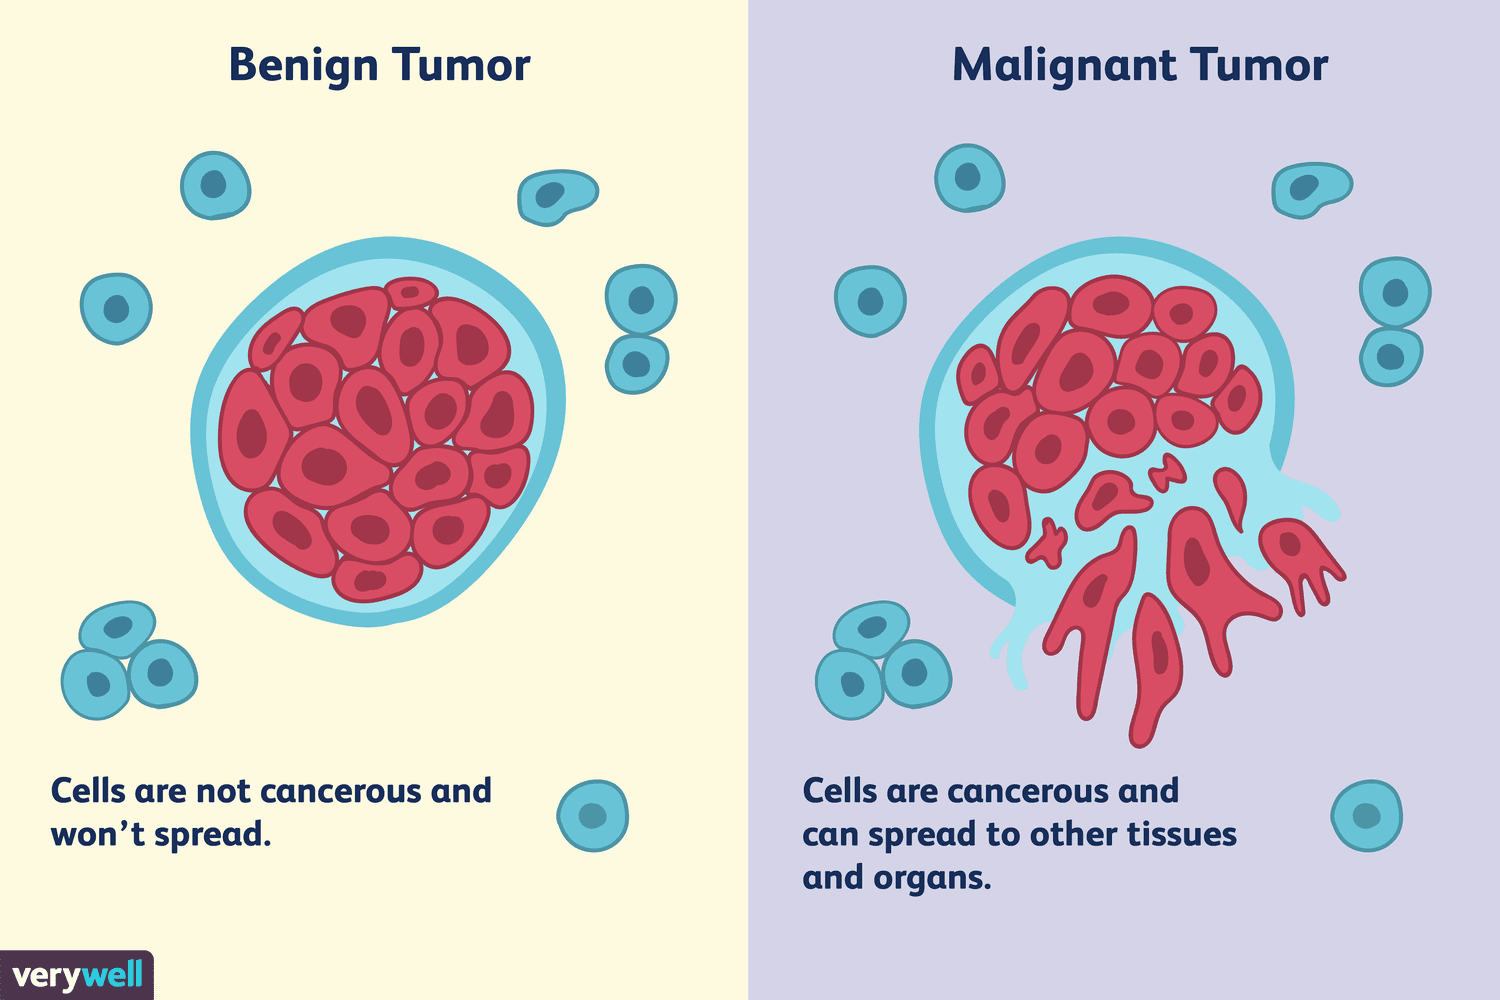

#APPROACH TO BREAST CANCER DETECTION

1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
        -Missing values: impute all missing values using Mean,Median and Mode
        -Inconistent values: Replace all inconsistence with consistent values
        -Outliers: Transform or let algorithm deal
4. Data Visualization
5. Data Analysis
        -Uni-Variant Analysis(Mean,Median and Mode,Skewness)
        -Bi-Varient Analysis(Correlation,Covariance,Chi-square test)
        -Multi-Varient Analysis
              *Regression:Not a regression problem
              *Classification: 1.KNN 2.Logistic reg 3.Random forest 4.GB BOOST(XGB)
6. Compare results
7. Create a app

# **EXPLORATORY DATA ANALYSIS**

#IMPORTING ALL LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

#LOAD THE DATA

In [ ]:
!unzip '/content/archive (4).zip'

Archive:  /content/archive (4).zip
  inflating: breast-cancer.csv       


In [ ]:
df=pd.read_csv('/content/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#AUDIT THE DATA

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.shape

(569, 32)

#DATA PREPARATION AND TRANSFORMATION

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
le = LabelEncoder()
df.diagnosis = le.fit_transform(df['diagnosis'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop ('id', axis = 1 )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<Axes: >

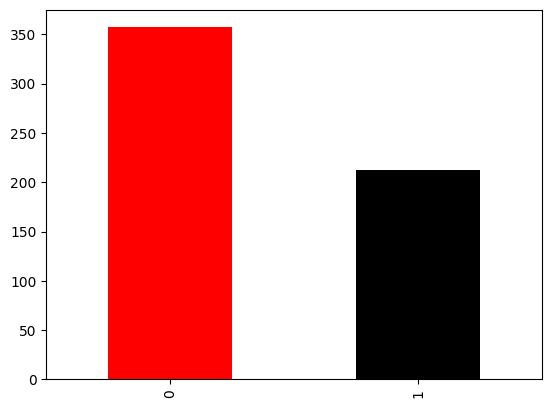

In [ ]:
df['diagnosis'].value_counts().plot(kind = "bar", color = ["red", "black"])

In [ ]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
df.skew()

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

<Axes: >

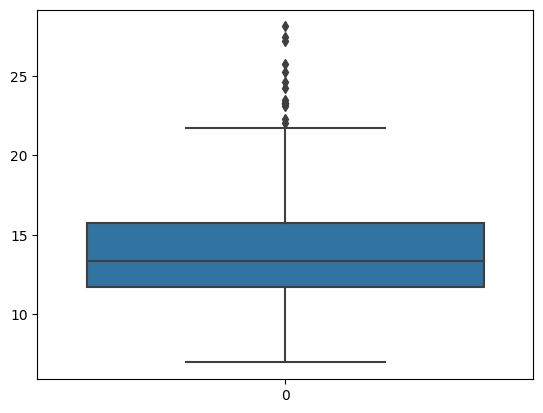

In [ ]:
sns.boxplot(df['radius_mean'])
#eg

In [ ]:
def outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [ ]:
low,high=outlier(df['radius_mean'])
df['radius_mean']=np.where(df['radius_mean']>high,high,df['radius_mean'])
df['radius_mean']=np.where(df['radius_mean']<low,low,df['radius_mean'])

<Axes: >

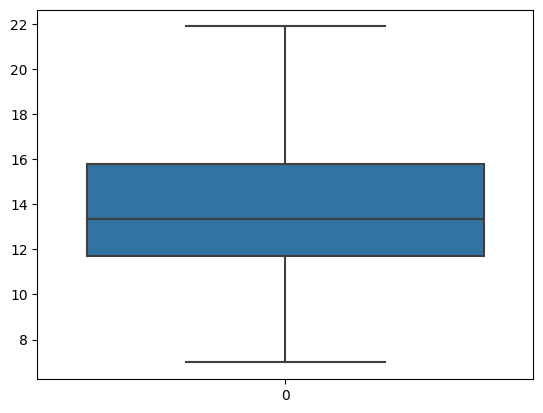

In [ ]:
sns.boxplot(df['radius_mean'])
#eg

In [ ]:
low,high=outlier(df['area_mean'])
df['area_mean']=np.where(df['area_mean']>high,high,df['area_mean'])
df['area_mean']=np.where(df['area_mean']<low,low,df['area_mean'])

In [ ]:
low,high=outlier(df['compactness_mean'])
df['compactness_mean']=np.where(df['compactness_mean']>high,high,df['compactness_mean'])
df['compactness_mean']=np.where(df['compactness_mean']<low,low,df['compactness_mean'])

In [ ]:
low,high=outlier(df['concavity_mean'])
df['concavity_mean']=np.where(df['concavity_mean']>high,high,df['concavity_mean'])
df['concavity_mean']=np.where(df['concavity_mean']<low,low,df['concavity_mean'])

In [ ]:
low,high=outlier(df['radius_se'])
df['radius_se']=np.where(df['radius_se']>high,high,df['radius_se'])
df['radius_se']=np.where(df['radius_se']<low,low,df['radius_se'])

In [ ]:
low,high=outlier(df['perimeter_se'])
df['perimeter_se']=np.where(df['perimeter_se']>high,high,df['perimeter_se'])
df['perimeter_se']=np.where(df['perimeter_se']<low,low,df['perimeter_se'])

In [ ]:
low,high=outlier(df['area_se'])
df['area_se']=np.where(df['area_se']>high,high,df['area_se'])
df['area_se']=np.where(df['area_se']<low,low,df['area_se'])

In [ ]:
low,high=outlier(df['smoothness_se'])
df['smoothness_se']=np.where(df['smoothness_se']>high,high,df['smoothness_se'])
df['smoothness_se']=np.where(df['smoothness_se']<low,low,df['smoothness_se'])

In [ ]:
low,high=outlier(df['concavity_se'])
df['concavity_se']=np.where(df['concavity_se']>high,high,df['concavity_se'])
df['concavity_se']=np.where(df['concavity_se']<low,low,df['concavity_se'])

In [ ]:
low,high=outlier(df['symmetry_se'])
df['symmetry_se']=np.where(df['symmetry_se']>high,high,df['symmetry_se'])
df['symmetry_se']=np.where(df['symmetry_se']<low,low,df['symmetry_se'])

In [ ]:
low,high=outlier(df['fractal_dimension_se'])
df['fractal_dimension_se']=np.where(df['fractal_dimension_se']>high,high,df['fractal_dimension_se'])
df['fractal_dimension_se']=np.where(df['fractal_dimension_se']<low,low,df['fractal_dimension_se'])

In [ ]:
low,high=outlier(df['fractal_dimension_worst'])
df['fractal_dimension_worst']=np.where(df['fractal_dimension_worst']>high,high,df['fractal_dimension_worst'])
df['fractal_dimension_worst']=np.where(df['fractal_dimension_worst']<low,low,df['fractal_dimension_worst'])

In [ ]:
low,high=outlier(df['area_worst'])
df['area_worst']=np.where(df['area_worst']>high,high,df['area_worst'])
df['area_worst']=np.where(df['area_worst']<low,low,df['area_worst'])

In [ ]:
low,high=outlier(df['compactness_se'])
df['compactness_se']=np.where(df['compactness_se']>high,high,df['compactness_se'])
df['compactness_se']=np.where(df['compactness_se']<low,low,df['compactness_se'])

In [ ]:
low,high=outlier(df['compactness_worst'])
df['compactness_worst']=np.where(df['compactness_worst']>high,high,df['compactness_worst'])
df['compactness_worst']=np.where(df['compactness_worst']<low,low,df['compactness_worst'])

In [ ]:
df.skew()

<ipython-input-23-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


id                         6.473752
radius_mean                0.655953
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  0.922884
smoothness_mean            0.456324
compactness_mean           0.826755
concavity_mean             1.023859
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  1.025031
texture_se                 1.646444
perimeter_se               1.034389
area_se                    1.130940
smoothness_se              0.780923
compactness_se             0.990285
concavity_se               0.916740
concave points_se          1.444678
symmetry_se                0.869297
fractal_dimension_se       0.979344
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.048970
smoothness_worst           0.415426
compactness_worst          0.915295
concavity_worst            1

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#DATA VISUALIZATION

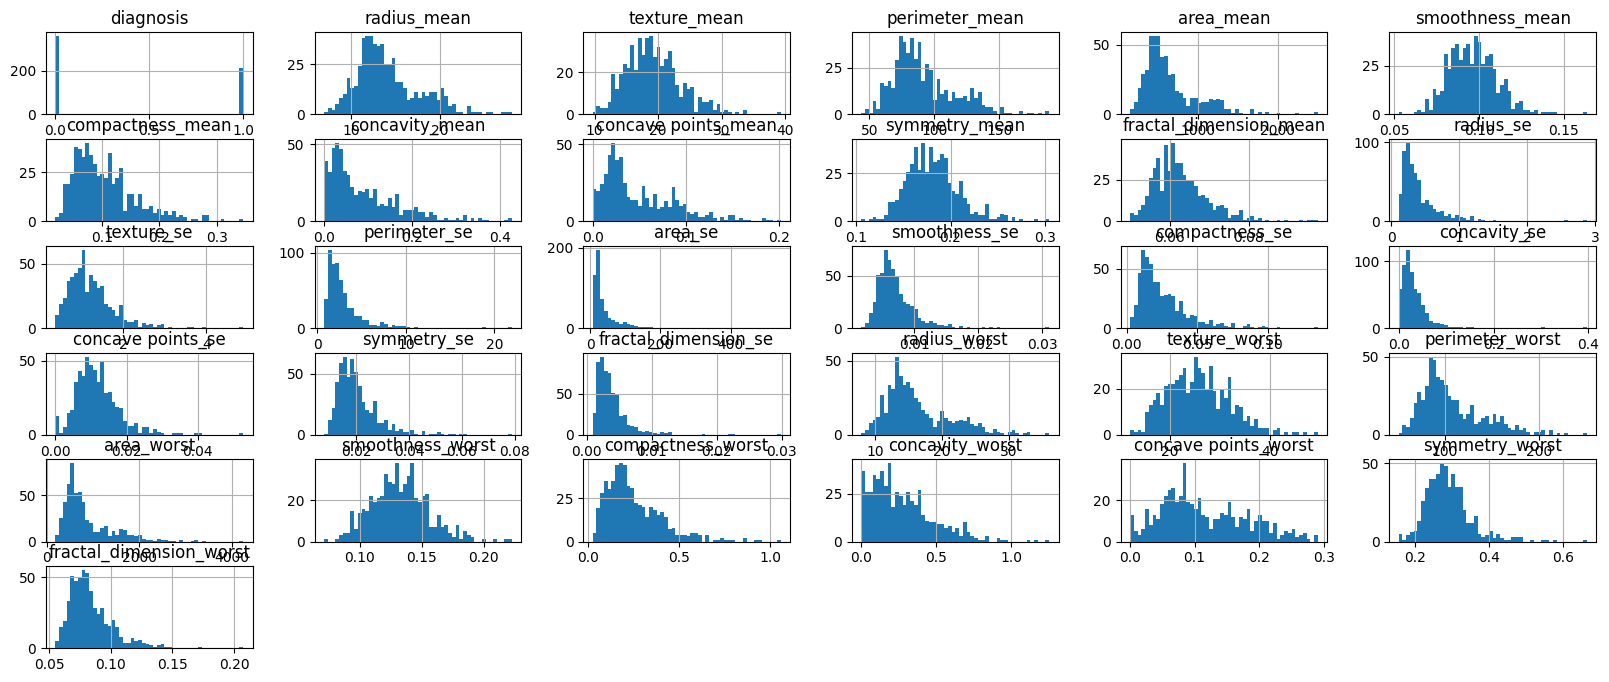

In [ ]:
df.hist(bins = 50, figsize = (20,8))
plt.show()

<ipython-input-8-adafdd1743bf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Reds')


<Axes: >

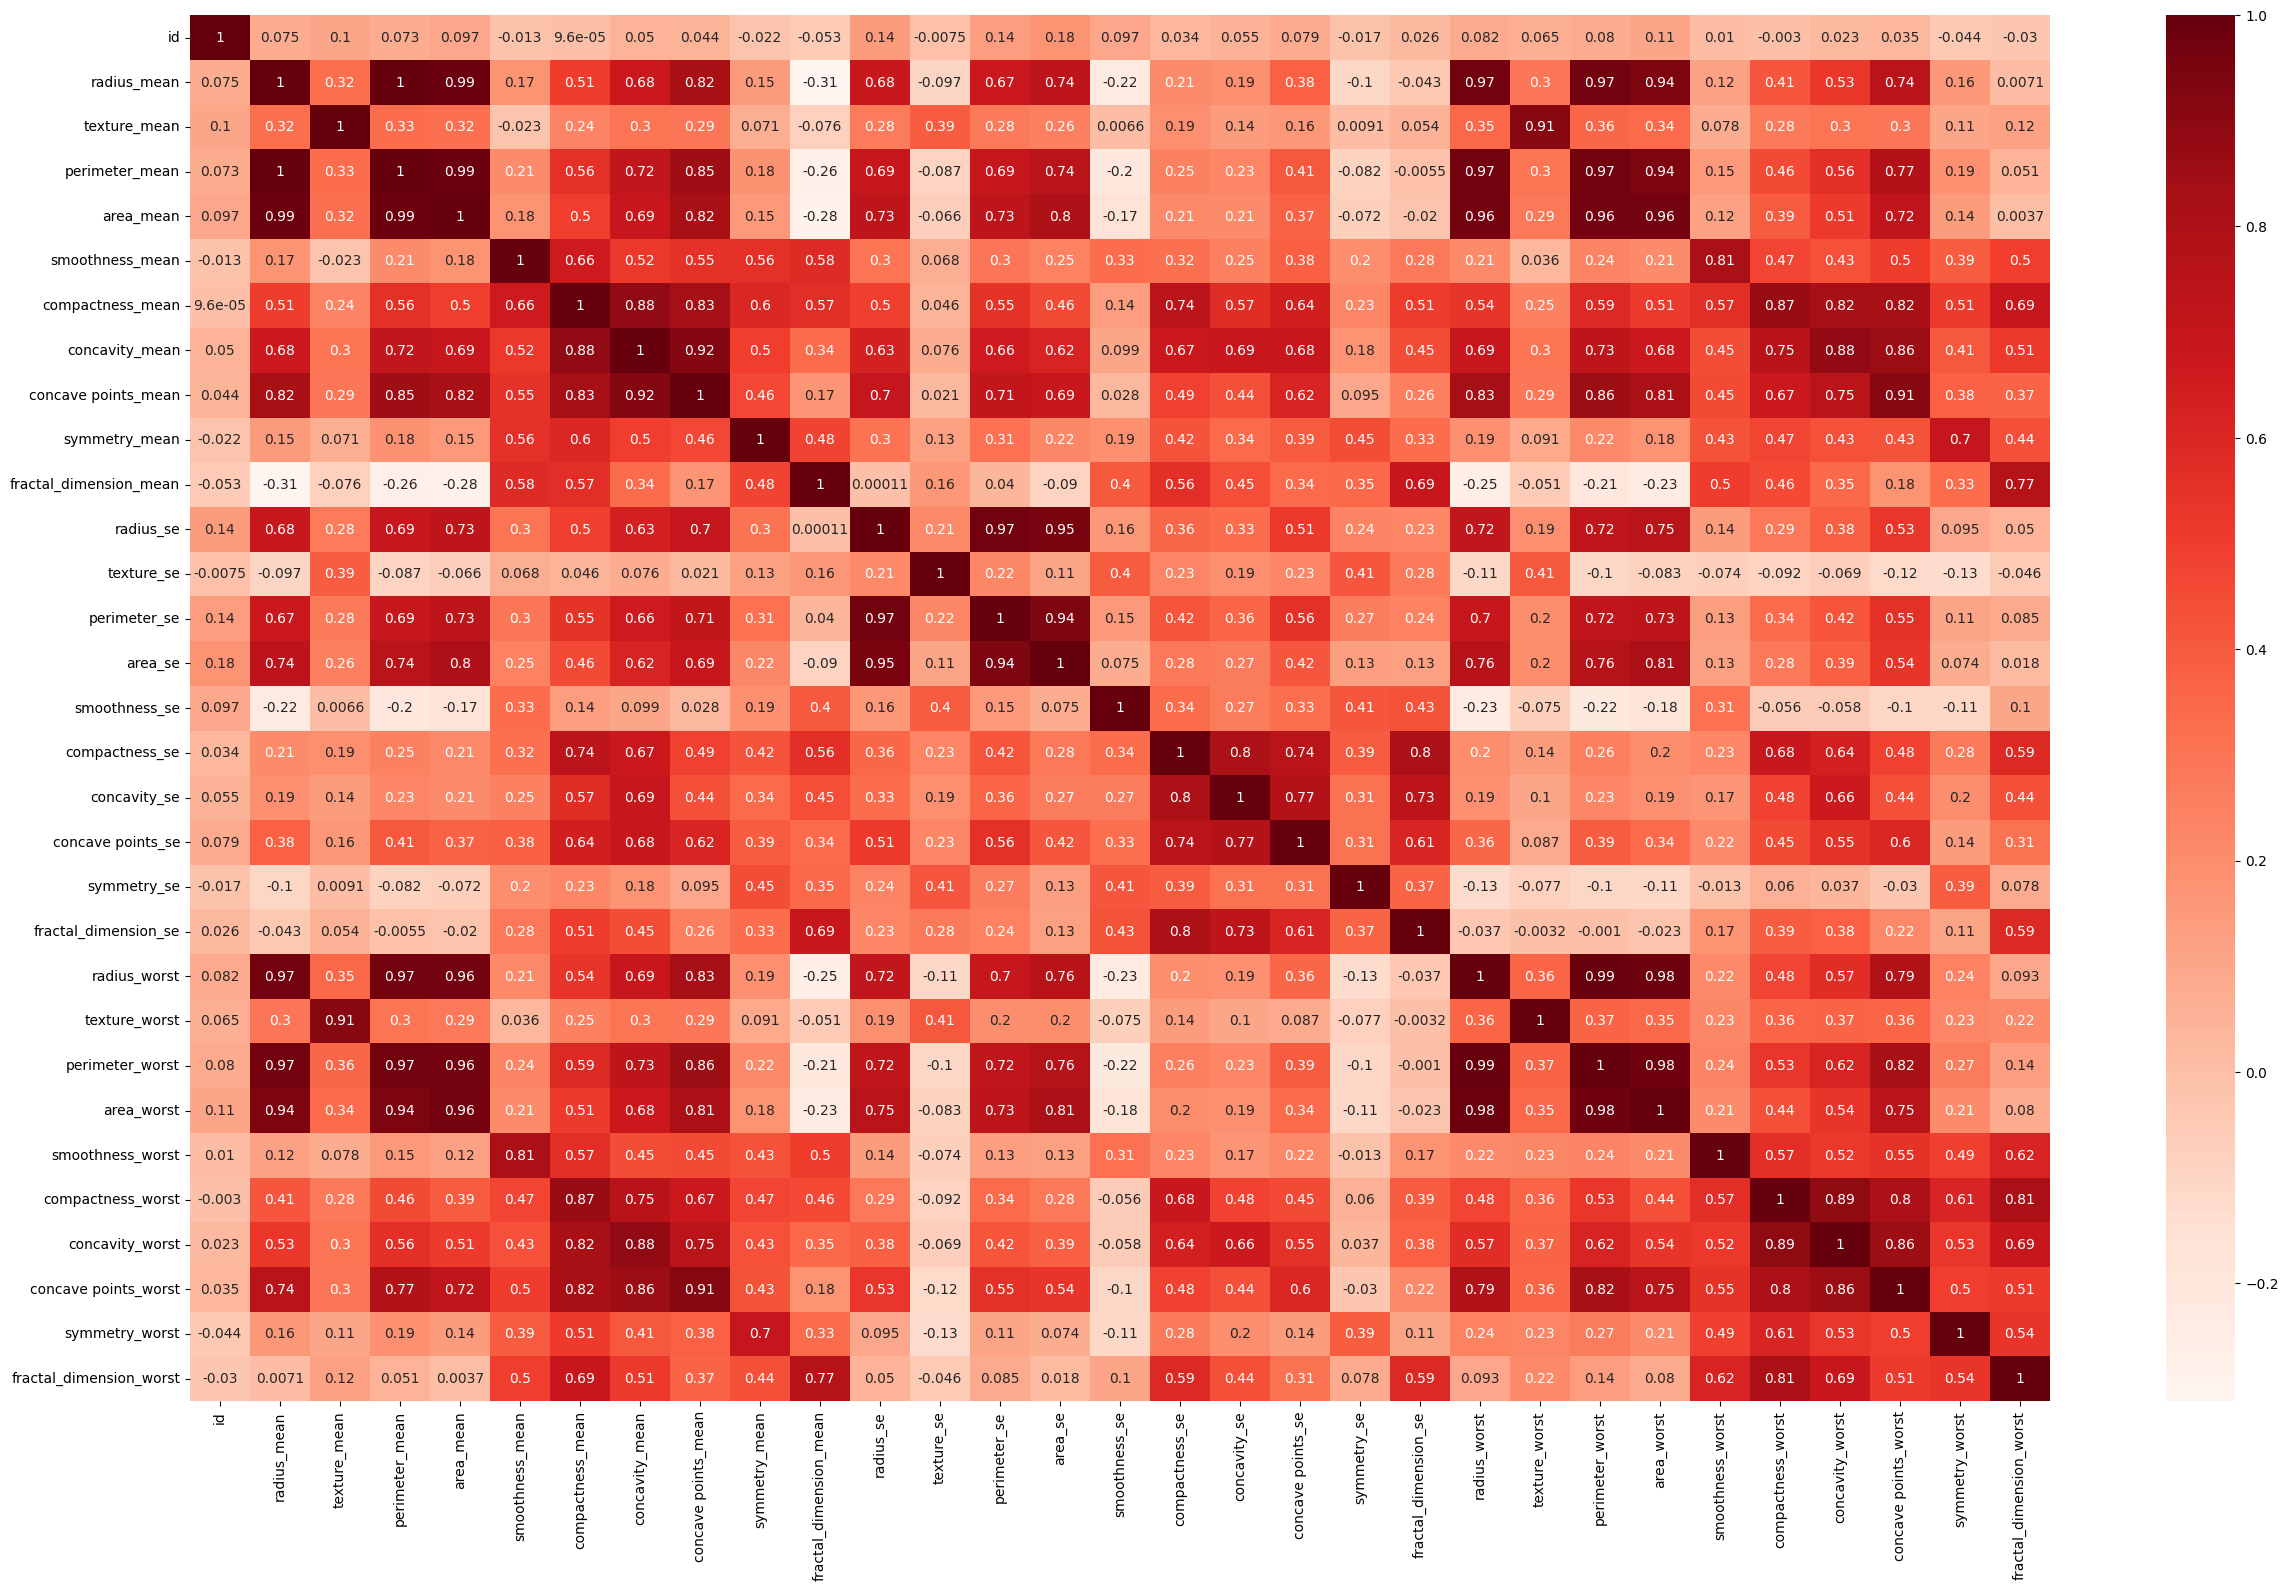

In [ ]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),annot=True,cmap='Reds')

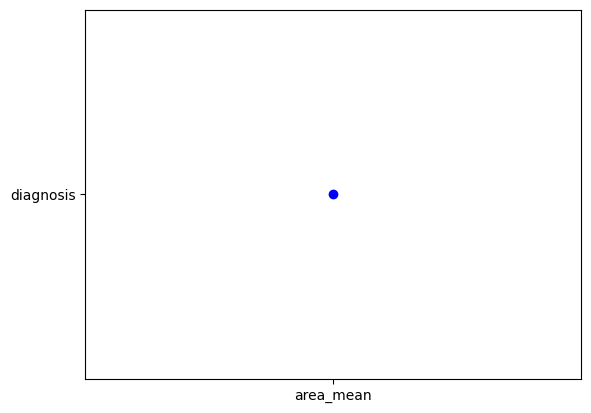

In [ ]:
plt.scatter('area_mean', 'diagnosis', c = 'blue')

Text(0.5, 1.0, 'barchart')

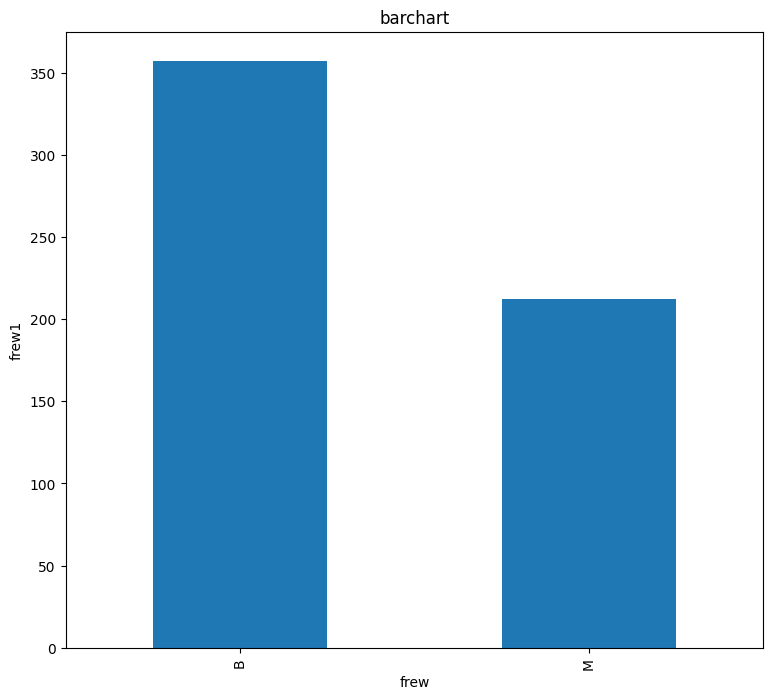

In [ ]:
plt.figure(figsize=(9,8))
df['area_mean'].value_counts().plot(kind='bar')
df['diagnosis'].value_counts().plot(kind='bar')
plt.xlabel('frew')
plt.ylabel('frew1')
plt.title('barchart')


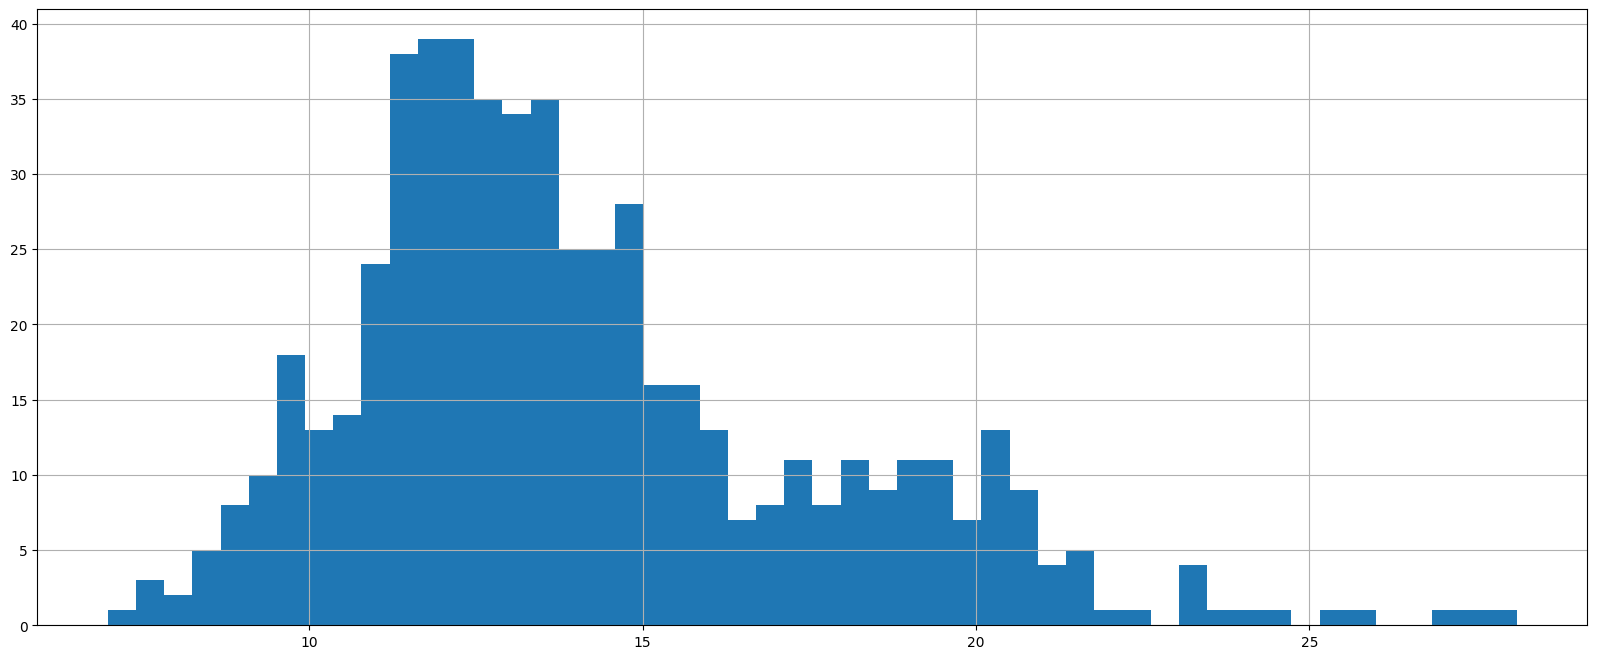

In [ ]:
df["radius_mean"].hist(bins = 50, figsize = (20,8))
plt.show()

#DATA ANALYSIS - MODELLING

In [ ]:
x=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [ ]:
print(x.shape)
print(y.shape)

(569, 31)
(569,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scalar=StandardScaler()
x_train_scal=scalar.fit_transform(x_train)
x_test_scal=scalar.fit_transform(x_test)

In [ ]:
x_train_scal

array([[-0.23712699, -1.50747921, -0.43531947, ...,  0.9320124 ,
         2.09724217,  2.10742408],
       [-0.23702031,  2.11561357,  1.73302577, ...,  2.6989469 ,
         1.89116053,  2.44724986],
       [-0.23712907, -1.46422199, -1.24962228, ..., -0.97023893,
         0.59760192,  0.09683961],
       ...,
       [-0.17630431,  0.0729114 , -0.55500086, ..., -1.23903365,
        -0.70863864, -1.36484297],
       [-0.23675669, -0.02021179,  0.10207345, ...,  1.05001236,
         0.43432185,  1.36733164],
       [-0.2371006 , -0.56092707,  0.31327591, ..., -0.61102866,
        -0.3345212 , -0.89735125]])

#LOGISTIC REGRESSION



In [ ]:
lr=LogisticRegression()
lr.fit(x_train_scal,y_train)
preds_ytrain_lr=lr.predict(x_train_scal)
preds_ytest_lr=lr.predict(x_test_scal)

In [ ]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score)
   print(cn_matrix)
   print(cla_report)

In [ ]:
acc_report(y_train,preds_ytrain_lr)

accuracy:: 0.989010989010989
[[286   0]
 [  5 164]]
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       286
           M       1.00      0.97      0.98       169

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [ ]:
acc_report(y_test,preds_ytest_lr)

accuracy:: 0.9824561403508771
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#RANDOM FOREST

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scal, y_train)
preds_rf_train=rf.predict(x_train_scal)
preds_rf_test=rf.predict(x_test_scal)

In [ ]:
acc_report(y_train,preds_rf_train)

accuracy:: 1.0
[[286   0]
 [  0 169]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [ ]:
acc_report(y_test,preds_rf_test)

accuracy:: 0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#DECISION TREE

In [ ]:
dtree=DecisionTreeClassifier(max_depth=3,min_samples_split=3)
dtree.fit(x_train_scal,y_train)
preds_dtree_train=dtree.predict(x_train_scal)
preds_dtree_test=dtree.predict(x_test_scal)

In [ ]:
acc_report(y_train,preds_dtree_train)

accuracy:: 0.9758241758241758
[[282   4]
 [  7 162]]
              precision    recall  f1-score   support

           B       0.98      0.99      0.98       286
           M       0.98      0.96      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



In [ ]:
acc_report(y_test,preds_dtree_test)

accuracy:: 0.9385964912280702
[[69  2]
 [ 5 38]]
              precision    recall  f1-score   support

           B       0.93      0.97      0.95        71
           M       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



#KNN - K NEAREST NEIGHBOURS

In [ ]:
np.sqrt(569)

23.853720883753127

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train_scal, y_train)
preds_knn_train=knn.predict(x_train_scal)
preds_knn_test=knn.predict(x_test_scal)

In [ ]:
acc_report(y_train,preds_knn_train)

accuracy:: 0.9494505494505494
[[285   1]
 [ 22 147]]
              precision    recall  f1-score   support

           B       0.93      1.00      0.96       286
           M       0.99      0.87      0.93       169

    accuracy                           0.95       455
   macro avg       0.96      0.93      0.94       455
weighted avg       0.95      0.95      0.95       455



In [ ]:
acc_report(y_test,preds_knn_test)

accuracy:: 0.956140350877193
[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#GUASSIAN NAIVE BAYES

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train_scal, y_train)
preds_gnb_train=gnb.predict(x_train_scal)
preds_gnb_test=gnb.predict(x_test_scal)

In [ ]:
acc_report(y_train,preds_gnb_train)

accuracy:: 0.9296703296703297
[[271  15]
 [ 17 152]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       286
           1       0.91      0.90      0.90       169

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.92       455
weighted avg       0.93      0.93      0.93       455



In [ ]:
acc_report(y_test,preds_gnb_test)

accuracy:: 0.956140350877193
[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#GRADIENT BOOSTER

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train_scal, y_train)
preds_gb_train=gb.predict(x_train_scal)
preds_gb_test=gb.predict(x_test_scal)

In [ ]:
acc_report(y_train,preds_gb_train)

accuracy:: 1.0
[[286   0]
 [  0 169]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [ ]:
acc_report(y_test,preds_gb_test)

accuracy:: 0.9649122807017544
[[71  0]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



#SVM - SUPPORT VECTOR MACHINE

In [ ]:
svm = SVC(random_state=42)
svm.fit(x_train_scal, y_train)
preds_svm_train=gb.predict(x_train_scal)
preds_svm_test=gb.predict(x_test_scal)

In [ ]:
acc_report(y_train,preds_svm_train)

accuracy:: 1.0
[[286   0]
 [  0 169]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [ ]:
acc_report(y_test,preds_svm_test)

accuracy:: 0.9649122807017544
[[71  0]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



LOGISTIC REGRESSION SUITS BEST FOR THIS DATASET .